In [1]:
# fetching the training dataset 
import pandas as pd
import numpy as np

occupancy_data = pd.read_csv('datatraining.csv',names=None)

In [2]:
from pandas import DataFrame

occupancy_data['date']= pd.to_datetime(occupancy_data['date'])
dt = DataFrame

occupancy_data['month'] = occupancy_data['date'].dt.month
occupancy_data['year'] = occupancy_data['date'].dt.year
occupancy_data['day'] = occupancy_data['date'].dt.day
occupancy_data['hour'] = occupancy_data['date'].dt.hour
occupancy_data['second'] = occupancy_data['date'].dt.second
occupancy_data['minute'] = occupancy_data['date'].dt.minute

In [3]:
occupancy_data['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0 for i in occupancy_data['date']]
occupancy_data.sample(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,month,year,day,hour,second,minute,period_of_day
6857,2015-02-09 12:07:00,21.500000,33.4475,464.000000,1445.750000,0.005312,1,2,2015,9,12,0,7,1
5580,2015-02-08 14:50:00,20.356667,26.2000,70.333333,424.333333,0.003869,0,2,2015,8,14,0,50,1
3376,2015-02-07 02:06:00,19.890000,18.8900,0.000000,439.000000,0.002705,0,2,2015,7,2,0,6,0
2878,2015-02-06 17:48:00,21.650000,21.1250,433.000000,811.750000,0.003375,1,2,2015,6,17,0,48,1
3342,2015-02-07 01:32:00,19.945000,18.7900,0.000000,434.500000,0.002700,0,2,2015,7,1,0,32,0
2276,2015-02-06 07:46:00,20.100000,18.7450,419.000000,451.000000,0.002720,0,2,2015,6,7,0,46,1
4602,2015-02-07 22:32:00,19.790000,28.1500,0.000000,433.500000,0.004015,0,2,2015,7,22,0,32,0
2037,2015-02-06 03:47:00,20.500000,18.8900,0.000000,431.000000,0.002810,0,2,2015,6,3,0,47,0
5789,2015-02-08 18:19:00,19.290000,27.5000,0.000000,425.000000,0.003801,0,2,2015,8,18,0,19,0
3806,2015-02-07 09:16:00,20.000000,19.2900,126.333333,450.666667,0.002782,0,2,2015,7,9,0,16,1


In [4]:
trainingdata = occupancy_data.drop(['date','month','year','day','hour','second','minute'],axis=1)
trainingdata.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,period_of_day
1,23.18,27.2720,426.0,721.25,0.004793,1,1
2,23.15,27.2675,429.5,714.00,0.004783,1,1
3,23.15,27.2450,426.0,713.50,0.004779,1,1
4,23.15,27.2000,426.0,708.25,0.004772,1,1
5,23.10,27.2000,426.0,704.50,0.004757,1,1


In [5]:
X_train = trainingdata.drop(['Occupancy'],axis=1)
y_train = trainingdata[['Occupancy']]


In [6]:
from pandas import DataFrame

testdata = pd.read_csv('datatest.csv',names=None)

testdata['date'] = pd.to_datetime(testdata['date'])
dt = DataFrame

testdata['month'] = testdata['date'].dt.month
testdata['year'] = testdata['date'].dt.year
testdata['day'] = testdata['date'].dt.day
testdata['hour'] = testdata['date'].dt.hour
testdata['second'] = testdata['date'].dt.second
testdata['minute'] = testdata['date'].dt.minute

testdata['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0 for i in testdata['date']]

testdata = testdata.drop(['date','month','year','day','hour','second','minute'],axis=1)

X_test = testdata.drop(['Occupancy'],axis=1)
y_test = testdata[['Occupancy']]

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
y_pred_lda = lda.fit(X_train, np.ravel(y_train)).predict(X_test)

In [8]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred_lda,y_test)

0.02101313320825516

In [9]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_lda)
cnf_matrix

array([[1638,   55],
       [   1,  971]])

Text(0.5, 257.44, 'Predicted label')

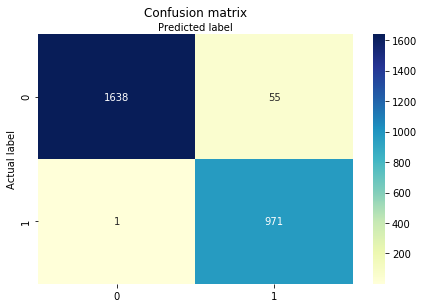

In [10]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [11]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lda))
print("Precision:",metrics.precision_score(y_test, y_pred_lda))
print("Recall:",metrics.recall_score(y_test, y_pred_lda))

Accuracy: 0.9789868667917448
Precision: 0.9463937621832359
Recall: 0.9989711934156379


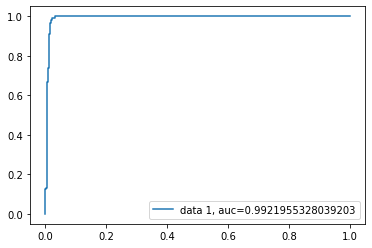

In [12]:
y_pred_proba = lda.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()